In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Date stuff
from datetime import datetime
from datetime import timedelta

import scipy.stats as stats

from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('credit_card.csv')

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.shape

(8950, 18)

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

MISSING VALUES TREATMENT:

In [15]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)

In [21]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)

In [22]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

8949

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CATEGORICAL VARIABLES EDA

In [26]:
cat = df[df.columns[[0]]] 

In [27]:
cat.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [28]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [29]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 18)

In [30]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 18)

In [31]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 18)

In [32]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 18)

As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [33]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [34]:
df['purchase_type']=df.apply(purchase,axis=1)


In [35]:
df['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [36]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,one_off


In [37]:
df.shape

(8950, 19)

In [39]:
cat = df[df.columns[[0,18]]] 

In [40]:
cat.head()

,CUST_ID,purchase_type
0,C10001,istallment
1,C10002,none
2,C10003,one_off
3,C10004,one_off
4,C10005,one_off


In [41]:
print('Column_name : ' ,cat.iloc[:,1].name)
print('Type : ',cat.iloc[:,1].dtype)

print('Null_value_count: ',cat.iloc[:,1].isna().sum())

Column_name :  purchase_type
Type :  object
Null_value_count:  0


In [42]:
cat.iloc[:,1].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

both_oneoff_installment    31.0%
istallment                 25.3%
none                       22.8%
one_off                    20.9%
Name: purchase_type, dtype: object

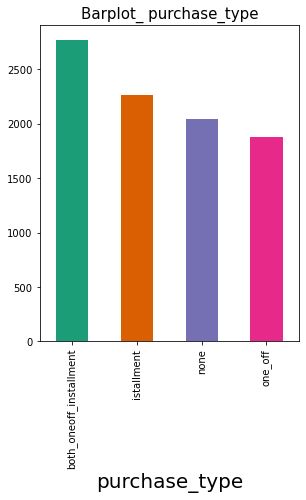

In [43]:
name = "Dark2"
cmap = get_cmap(name)
colors = cmap.colors
cat.iloc[:,1].value_counts().plot(kind = 'bar', color = colors)
plt.xlabel(cat.iloc[:,1].name, fontsize = 20)
plt.title('Barplot_ '+ cat.iloc[:,1].name, fontsize = 15)
plt.subplots_adjust(left=0.4, bottom=0.1, right=1, top=1.2)

NUMERICAL VARIABLES EDA

In [47]:
num = df[df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]]
                                                                         

In [48]:
num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [56]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

 BALANCE_FREQUENCY


In [49]:
print('Column_name : ' ,num.iloc[:,1].name)
print('Type : ',num.iloc[:,1].dtype)
print('Null_value_count: ',num.iloc[:,1].isna().sum())

Column_name :  BALANCE_FREQUENCY
Type :  float64
Null_value_count:  0


In [51]:
print('Skewness: ', num.iloc[:,1].skew())
num.iloc[:,1].describe()

Skewness:  -2.0232655185149078


count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

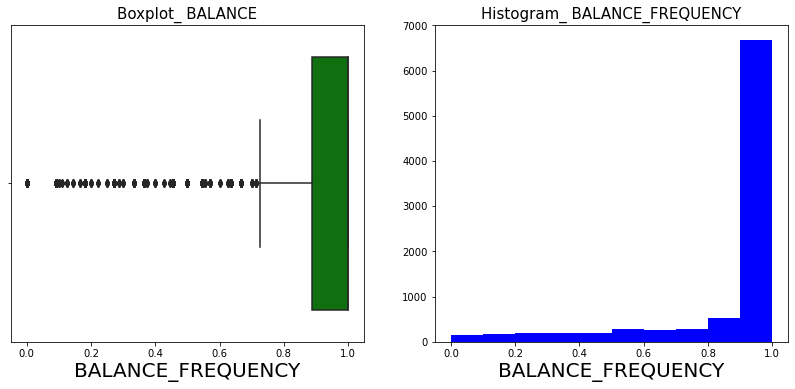

In [52]:
plt.subplot(1,2,1)
sns.boxplot(num.iloc[:,1], color = 'green')
plt.xlabel(num.iloc[:,1].name, fontsize = 20)
plt.title('Boxplot_ '+ num.iloc[:,0].name, fontsize = 15)
plt.subplot(1,2,2)
plt.hist(num.iloc[:,1], color = 'blue')
plt.xlabel(num.iloc[:,1].name, fontsize = 20)
plt.title('Histogram_ '+ num.iloc[:,1].name, fontsize = 15)
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.2, top=1.2)

In [65]:
print('Column_name : ' ,num.iloc[:,2].name)
print('Type : ',num.iloc[:,2].dtype)
print('Null_value_count: ',num.iloc[:,2].isna().sum())

Column_name :  BALANCE_FREQUENCY
Type :  float64
Null_value_count:  0


In [66]:
print('Skewness: ', num.iloc[:,2].skew())
num.iloc[:,2].describe()

Skewness:  8.144269064554651


count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

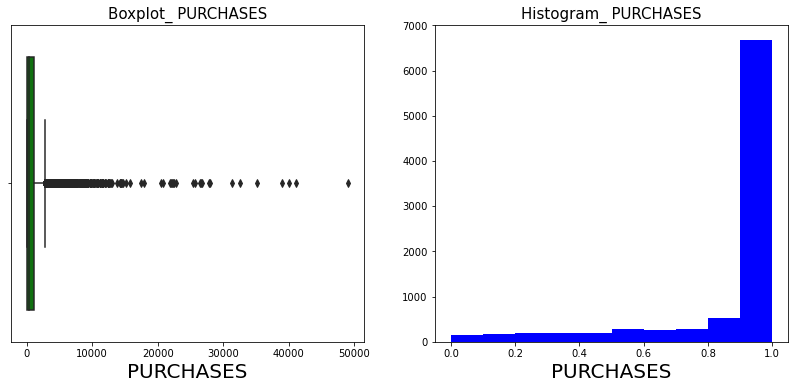

In [67]:
plt.subplot(1,2,1)
sns.boxplot(num.iloc[:,2], color = 'green')
plt.xlabel(num.iloc[:,2].name, fontsize = 20)
plt.title('Boxplot_ '+ num.iloc[:,2].name, fontsize = 15)
plt.subplot(1,2,2)
plt.hist(num.iloc[:,1], color = 'blue')
plt.xlabel(num.iloc[:,2].name, fontsize = 20)
plt.title('Histogram_ '+ num.iloc[:,2].name, fontsize = 15)
plt.subplots_adjust(left=0.4, bottom=0.1, right=2.2, top=1.2)

In [70]:
from scipy import stats 
z=np.abs(stats.zscore(num))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.31096755 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08931021 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10166318 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33546549 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34690648 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33294642 0.52555097 4.12276757]]


In [71]:
threshold = 3
print(np.where(z>3))

(array([   6,   19,   20, ..., 8947, 8948, 8949], dtype=int64), array([ 3, 14, 14, ..., 16, 16, 16], dtype=int64))


In [72]:
df1 = num[(z<3).all(axis=1)]

In [73]:
df1.shape

(7434, 17)

In [74]:
# log tranformation
cr_log=df.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [75]:
cr_log.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.951599,0.117730,2.519680
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.179645,0.211617,0.130367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.762968,0.133531,2.564949
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949


In [76]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]


In [77]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX'],
      dtype='object')

In [78]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [79]:
df[df['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,purchase_type


In [82]:
cre_original=pd.concat([df,pd.get_dummies(df['purchase_type'])],axis=1)

In [83]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=df.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


Now merge the created dummy with the original data frame

In [84]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [86]:
l=['purchase_type']

In [87]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()


BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [88]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   both_oneoff_installment           8950 non-null   uint8  
 10  istallment                        8950 non-null   uint8  
 11  none                              8950 non-null   uint8  
 12  one_of

In [102]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0,0,0,1


In [90]:
# Checking for multi-colinearity in data

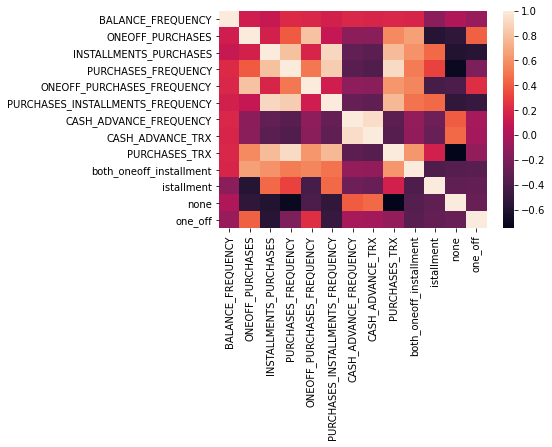

In [89]:
sns.heatmap(cr_dummy.corr())

In [91]:
#Standardrizing data¶

In [92]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_dummy.shape

(8950, 13)

In [93]:
cr_scaled=sc.fit_transform(cr_dummy)
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [125]:
#PCA Analysis

In [94]:
from sklearn.decomposition import PCA

In [95]:
cr_dummy.shape

(8950, 13)

In [97]:
#We have 13 features so our n_component will be 17.
pc=PCA(n_components=13)
cr_pca=pc.fit(cr_scaled)

In [98]:
#Lets check if we will take 13 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)


0.9999999999999997

In [100]:
var_ratio={}
for n in range(2,14):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [101]:
var_ratio

{2: 0.6379641558903612,
 3: 0.7926452887371669,
 4: 0.8749871260394186,
 5: 0.9372670382397948,
 6: 0.9663921237681238,
 7: 0.9823252369987642,
 8: 0.9875874183675946,
 9: 0.9921786727484765,
 10: 0.995727360506676,
 11: 0.9981479900802095,
 12: 0.9999999999999997,
 13: 0.9999999999999997}

In [103]:
#Lets select 7 components for 95% variance

In [104]:
pc=PCA(n_components=7)

In [105]:
p=pc.fit(cr_scaled)

In [106]:
cr_scaled.shape

(8950, 13)

In [107]:
p.explained_variance_

array([5.48521175, 2.80924903, 2.01107943, 1.0705635 , 0.80972933,
       0.37866842, 0.20715362])

In [108]:
np.sum(p.explained_variance_)

12.771655081551698

In [109]:
np.sum(p.explained_variance_)

12.771655081551698

In [110]:
var_ratio

{2: 0.6379641558903612,
 3: 0.7926452887371669,
 4: 0.8749871260394186,
 5: 0.9372670382397948,
 6: 0.9663921237681238,
 7: 0.9823252369987642,
 8: 0.9875874183675946,
 9: 0.9921786727484765,
 10: 0.995727360506676,
 11: 0.9981479900802095,
 12: 0.9999999999999997,
 13: 0.9999999999999997}

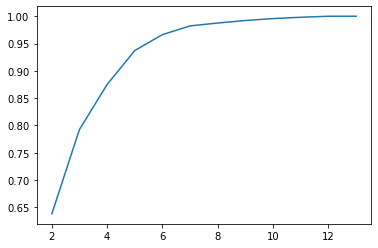

In [111]:
pd.Series(var_ratio).plot()

In [115]:
pc_final=PCA(n_components=7).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [116]:
df2=pd.DataFrame(reduced_cr)

In [117]:
df2.head()

,0,1,2,3,4,5,6
0,-0.530484,-2.138303,-1.051495,0.096566,-0.298716,-0.388012,1.404549
1,-3.341381,-0.175496,0.886862,-0.721743,-0.450410,0.257746,-0.097608
2,0.903853,2.616061,-2.121310,1.018947,-1.014337,1.609692,0.105057
3,-1.506992,1.579686,-2.161116,0.473922,0.588916,-0.910135,-0.220697
4,-1.476668,0.908518,-2.157286,0.485434,-1.058013,-0.949828,-0.093104


In [118]:
#Data reduced to 7 variables

In [119]:
df2.shape

(8950, 7)

In [121]:
col_list=cr_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'both_oneoff_installment',
       'istallment', 'none', 'one_off'],
      dtype='object')

In [122]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
BALANCE_FREQUENCY,0.068549,0.126702,0.343745,0.273817,-0.856292,-0.198550,0.113459
ONEOFF_PURCHASES,0.230447,0.481292,-0.085432,-0.023362,0.094914,-0.177778,0.015264
INSTALLMENTS_PURCHASES,0.367228,-0.217786,0.190129,-0.048884,0.121670,-0.167728,0.190160
PURCHASES_FREQUENCY,0.398102,-0.049418,0.061029,0.182977,-0.018609,0.281913,-0.312117
ONEOFF_PURCHASES_FREQUENCY,0.238850,0.413758,-0.020886,-0.014696,-0.032331,0.668443,0.355653
PURCHASES_INSTALLMENTS_FREQUENCY,0.352390,-0.235394,0.191076,0.042533,0.027208,-0.011907,-0.578640
CASH_ADVANCE_FREQUENCY,-0.205957,0.148515,0.481782,0.349146,0.309874,0.021554,0.031747
CASH_ADVANCE_TRX,-0.219256,0.148820,0.483765,0.308982,0.292920,0.008554,-0.016946
PURCHASES_TRX,0.406122,0.058563,0.044508,0.145337,0.047456,0.186259,-0.099919
both_oneoff_installment,0.292984,0.222917,0.262391,-0.406297,0.130282,-0.357196,0.142736


In [124]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.421892
PC_1    0.216072
PC_2    0.154681
PC_3    0.082342
PC_4    0.062280
PC_5    0.029125
PC_6    0.015933
dtype: float64

Clustering

In [126]:
from sklearn.cluster import KMeans

In [127]:
km_4=KMeans(n_clusters=4,random_state=123)

In [128]:
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=123)

In [129]:
km_4.labels_

array([0, 3, 1, ..., 0, 3, 1])

In [130]:
pd.Series(km_4.labels_).value_counts()

2    2773
0    2248
3    2055
1    1874
dtype: int64

[114293.5413248059, 75297.28832982393, 53613.12786293222, 34524.68444934834, 30367.797614461768, 27113.522630219857, 24075.12531814966, 21688.365755325747, 19566.169198234336, 17784.819669142144]


NameError: name 'plot' is not defined

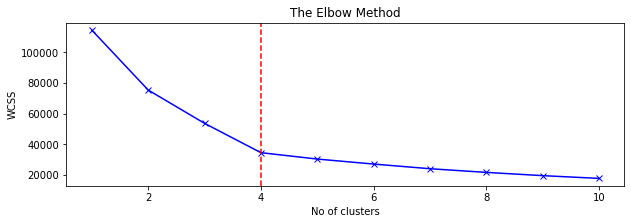

In [134]:
plt.figure(figsize = (10,3))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(reduced_cr)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow Method')
plt.axvline(4, color = 'red', linestyle = '--')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plot.show()

In [135]:
cluster_range = range( 1, 6)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [136]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,114293.541325
1,2,75297.489113
2,3,53613.189245
3,4,34524.701845
4,5,30367.866592


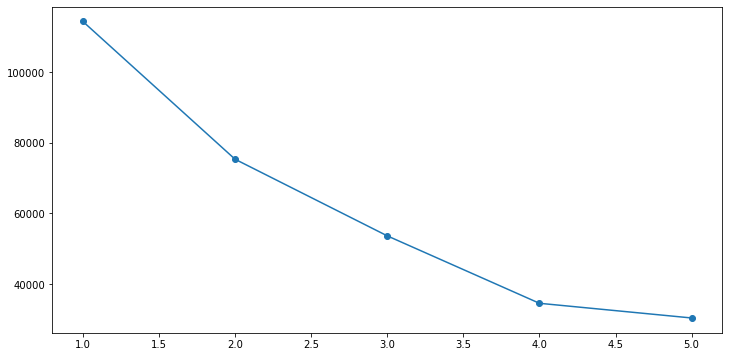

In [137]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [138]:
#Silhouette Coefficient

In [140]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [141]:
scores

[0.34787902310873203,
 0.4093085385265231,
 0.5057215894347051,
 0.48045188912841647,
 0.46513976053444145,
 0.44899974233959333,
 0.43314756017805406,
 0.44394732897130035,
 0.407379176570443,
 0.4142859021970064,
 0.42261917394897197,
 0.44463061293002026,
 0.43745898510591297,
 0.4371711849795589,
 0.43462858792134984,
 0.4323552192104259,
 0.4390497248080337,
 0.4414075332249725,
 0.4313561825634761]

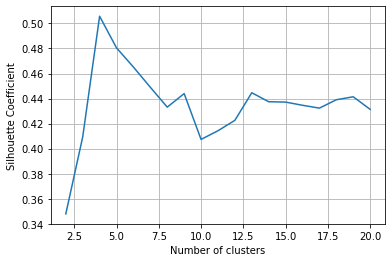

In [142]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

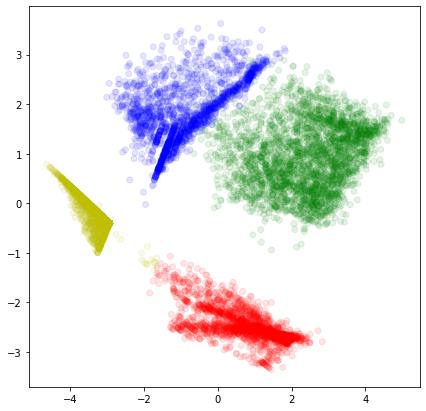

In [143]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [145]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(7)])

In [146]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [147]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Cluster
0,-0.530484,-2.138303,-1.051495,0.096566,-0.298716,-0.388012,1.404549,0
1,-3.341381,-0.175496,0.886862,-0.721743,-0.450410,0.257746,-0.097608,3
2,0.903853,2.616061,-2.121310,1.018947,-1.014337,1.609692,0.105057,1
3,-1.506992,1.579686,-2.161116,0.473922,0.588916,-0.910135,-0.220697,1
4,-1.476668,0.908518,-2.157286,0.485434,-1.058013,-0.949828,-0.093104,1


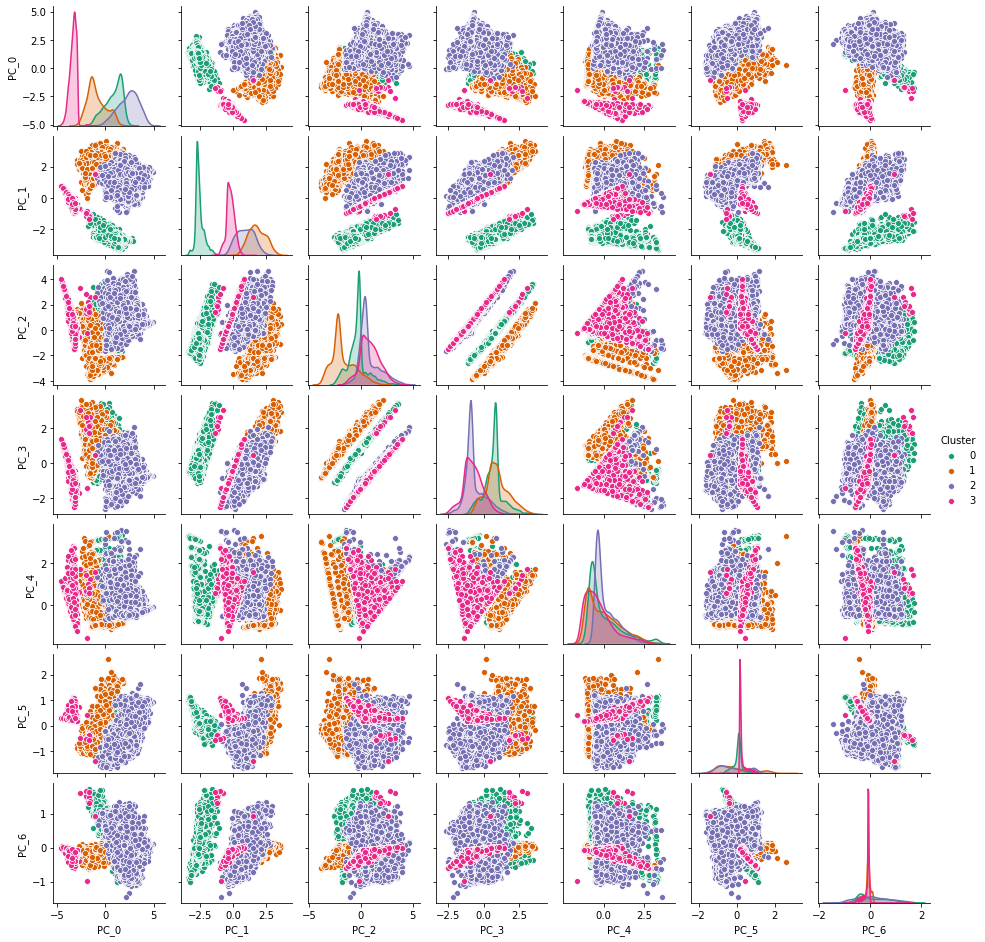

In [148]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)